In [112]:
from tensorflow.keras.models import load_model
import joblib
import datetime
import pandas as pd
import numpy as np
import pickle
from funciones_model import combinacion_pred
from funciones_model import lstm_pred
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# DATAFRAME
df = pd.read_excel("4_itbmpp_x_semana.xlsx", sheet_name = "Sheet1")

In [3]:
# CARGAR MODELO RED
scaler_red = joblib.load("modelos/scaler1.gz") #SCALER
red = load_model("modelos/model1.h5", compile=False) #MODEL

# CARGAR MODELO SERIE
with open('modelos/model2.pkl', 'rb') as pkl_file:
    series = pickle.load(pkl_file)

In [107]:
df2 = df.copy()
df2["WEEK"] = pd.to_datetime(df2.WEEK)
df2["RUC_P"] = np.abs(series.predict_in_sample())

In [108]:
dfl = df[["WEEK", "ITMBPP"]]; dfl.columns = ["WEEK", "q"]; dfl = dfl.set_index(["WEEK"])

In [109]:
for k in [1,4,8,16]:

    f = []
    v = []
    for i in tqdm(range(len(dfl)-7)):
        A = dfl.iloc[0:7+i]
        P = lstm_pred(A, red,scaler_red, k)
        f.append(list(P.keys())[-1])
        v.append(list(P.values())[-1])

    dfd = pd.DataFrame(zip(f,v), columns = ["WEEK", f"ITMBPP_{k}"]); dfd["WEEK"] = pd.to_datetime(dfd.WEEK)
    df2 = pd.merge(df2, dfd, "left", "WEEK")
    df2[f"TOTAL_ITBMS_{k}"] = df2["RUC"]*df2[f"ITMBPP_{k}"]

100%|██████████| 200/200 [04:16<00:00,  1.28s/it]


In [124]:
df2.to_excel("SLIDE_PANAMA.xlsx")

<ipython-input-124-6af678b578c3>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df2.to_excel("SLIDE_PANAMA.xlsx")


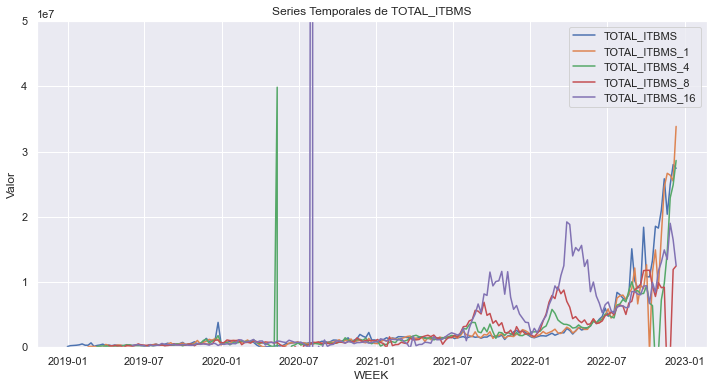

In [136]:
# Establecer el estilo de la gráfica
sns.set(style='darkgrid')

# Crear un objeto de gráfico (Figure) y un conjunto de subgráficos (Axes) de matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada serie temporal en el mismo subgráfico
sns.lineplot(x='WEEK', y='TOTAL_ITBMS', data=df2, label='TOTAL_ITBMS', ax=ax)
sns.lineplot(x='WEEK', y='TOTAL_ITBMS_1', data=df2, label='TOTAL_ITBMS_1', ax=ax)
sns.lineplot(x='WEEK', y='TOTAL_ITBMS_4', data=df2, label='TOTAL_ITBMS_4', ax=ax)
sns.lineplot(x='WEEK', y='TOTAL_ITBMS_8', data=df2, label='TOTAL_ITBMS_8', ax=ax)
sns.lineplot(x='WEEK', y='TOTAL_ITBMS_16', data=df2, label='TOTAL_ITBMS_16', ax=ax)

ax.set_ylim(0, 50000000)
# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('WEEK')
ax.set_ylabel('Valor')
ax.set_title('Series Temporales de TOTAL_ITBMS')

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

In [14]:
# PREDICCIÓN CON EL MODELO COMPLETO
# combinacion_pred(df, red, series, scaler_red, 1)
# combinacion_pred(A, red, series, scaler_red, 1)

{'2022-12-19': 33511389.862677738}

In [132]:
K = pd.DataFrame(zip(combinacion_pred(df, red, series, scaler_red, 48), combinacion_pred(df, red, series, scaler_red, 48).values()))

In [134]:
K.to_excel("COMPLETAR.xlsx")

<ipython-input-134-214e6976625d>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  K.to_excel("COMPLETAR.xlsx")
